### Trabajo Práctico
#### Procesamiento de Lenguaje Natural

### Análisis de discursos del Estado de la Unión (1964-2020)

##### Autor:
César Marín

Durante el desarrollo del presente proyecto final de asignatura se pretende analizar los diferentes discursos ofrecidos en la apertura del Estado de la Unión. Un evento decisivo en la democracia de los Estados Unidos de América en donde el presidente comunica la situación actual del país y sus propuestas legislativas para el año (Fuente: Wikipedia)

En este caso se tomaron las transcripciones de los discursos desde el año 1964 hasta el 2020. Una vez aplicados procesos de limpieza y preprocesamiento de texto en general, se llevarán a cabo modelos de predicción con el objetivo de poder establecer el partido político del presidente al cual pertenece el texto.

Particularmente, en el caso de los Estados Unidos de América este proceso se transforma en un problema de clasificación binaria ya que sólo existen dos grandes partidos políticos: **Demócrata** y **Republicano**

__________

Importamos todas las **librerías** necesarias para el desarrollo y resolución del problema

In [1]:
# Pandas para limpieza de datos
import pandas as pd

# Preprocesamiento de datos
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk.tokenize import word_tokenize


# ScikitLearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
import sklearn as sklearn
from sklearn.linear_model import LogisticRegression


# Visualización
import matplotlib.pyplot as plt
import seaborn as sns


import gensim.corpora as corpora
import pyLDAvis
from gensim import corpora, models, similarities, downloader
from pyLDAvis import gensim

# Numpy
import numpy as np


#### Se carga el dataset a utilizar 

In [2]:
# Cargamos el dataset correspondiente 
df = pd.read_excel('presidents.xlsx',engine="openpyxl")
print('Composición del dataset: ' + str(df.shape))

Composición del dataset: (57, 4)


In [3]:
#Se inspeccionan las columnas y primeras filas
df.head()

,Year,President,Party,Speech
0,1964,Lyndon B. Johnson,Democrat,"Mr. Speaker, Mr. President, Members of the Hou..."
1,1965,Lyndon B. Johnson,Democrat,"Mr. Speaker, Mr. President, Members of the Con..."
2,1966,Lyndon B. Johnson,Democrat,"Mr. Speaker, Mr. President, Members of the Hou..."
3,1967,Lyndon B. Johnson,Democrat,"Mr. Speaker, Mr. Vice President, distinguished..."
4,1968,Lyndon B. Johnson,Democrat,"Mr. Speaker, Mr. President, Members of the Con..."


Tal como se puede observar se tiene la recopilación de 57 discursos presidenciales *(1964-2020)*. Además, se tiene el nombre de los presidentes y al partido que pertenecen. 

### 1) Regresión lineal para la predicción del partido
Tal como si vió en la introducción del problema, se llevaran a cabo diferentes modelos para tratar de predecir de la mejor manera, y de acuerdo a diferentes métricas y visualizaciones, el partido de los presidentes según los discursos.

#### Preprocesamiento de la data
Antes de comenzar a aplicar los modelos de Machine Learning haremos la limpieza del cuerpo de textos

In [4]:
# En primer lugar se hace la conversión a minúscula de todos los documentos
df['Speech']=[x.lower() for x in df['Speech']]
df.head()

,Year,President,Party,Speech
0,1964,Lyndon B. Johnson,Democrat,"mr. speaker, mr. president, members of the hou..."
1,1965,Lyndon B. Johnson,Democrat,"mr. speaker, mr. president, members of the con..."
2,1966,Lyndon B. Johnson,Democrat,"mr. speaker, mr. president, members of the hou..."
3,1967,Lyndon B. Johnson,Democrat,"mr. speaker, mr. vice president, distinguished..."
4,1968,Lyndon B. Johnson,Democrat,"mr. speaker, mr. president, members of the con..."


In [5]:
# Eliminamos todos los signos de puntuación con la re '\W+'
signo_puntuacion = lambda x: re.sub(r'\W+', ' ', x)
df['Speech']=df['Speech'].map(signo_puntuacion)
df.head()

,Year,President,Party,Speech
0,1964,Lyndon B. Johnson,Democrat,mr speaker mr president members of the house a...
1,1965,Lyndon B. Johnson,Democrat,mr speaker mr president members of the congres...
2,1966,Lyndon B. Johnson,Democrat,mr speaker mr president members of the house a...
3,1967,Lyndon B. Johnson,Democrat,mr speaker mr vice president distinguished mem...
4,1968,Lyndon B. Johnson,Democrat,mr speaker mr president members of the congres...


In [6]:
# Removemos aquellas palabras que contienen números
# En este caso se contaban con un número importante de estas palabras
# Las cuales no añadían ningún significado para el análisis posterior

alfanumerico=lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
df['Speech']=df['Speech'].map(alfanumerico)
df.head()

,Year,President,Party,Speech
0,1964,Lyndon B. Johnson,Democrat,mr speaker mr president members of the house a...
1,1965,Lyndon B. Johnson,Democrat,mr speaker mr president members of the congres...
2,1966,Lyndon B. Johnson,Democrat,mr speaker mr president members of the house a...
3,1967,Lyndon B. Johnson,Democrat,mr speaker mr vice president distinguished mem...
4,1968,Lyndon B. Johnson,Democrat,mr speaker mr president members of the congres...


#### Bigramas y trigramas
Hacemos este análisis de ngramas antes de llevar acabo la depuración con las stopwords. El principal objetivo es detectar aquellos bigramas y trigramas más comunes en el texto y que tienen un significado como una única expresión. 

Se identifican los bigramas de cada uno de los textos y se cuentan para obtener una lista descendente según la frecuencia

In [7]:
# Búsqueda y conteo de los bigramas en los textos

text_all=[]
for i in df['Speech']:
    str(text_all.append(i))
    
bigramas_list=[]
for i in text_all:
    texto_tokenizado = word_tokenize(i) 
    bigramas = ngrams(texto_tokenizado,2) 
    bigramas_ = pd.Series(list(bigramas)).value_counts()
    bigramas_list.append(bigramas_)
    df1 =pd.DataFrame(bigramas_list)
    
#Suma y ordenamiento de los bigramas según frecuencia
df_bigram = df1.sum(axis=0)
df_bigram = df_bigram.sort_values(ascending=False)
df_bigram.head(60)

of        the         1493.0
in        the         1408.0
to        the          748.0
of        our          719.0
we        must         677.0
and       the          636.0
we        have         592.0
the       world        584.0
for       the          549.0
we        will         545.0
          can          518.0
and       we           419.0
          i            412.0
we        are          411.0
on        the          405.0
that      we           385.0
and       to           355.0
will      be           342.0
it        s            340.0
with      the          334.0
in        our          332.0
the       american     324.0
more      than         324.0
it        is           319.0
in        this         315.0
the       congress     312.0
i         will         300.0
to        be           291.0
a         new          288.0
we        ve           281.0
the       united       277.0
that      s            274.0
united    states       258.0
in        a            257.0
of        a   

In [8]:
# Se repite el procedimiento para los trigramas

trigramas_list=[]

for i in text_all:
    texto_tokenizado = word_tokenize(i) 
    trigramas = ngrams(texto_tokenizado,3) 
    trigramas_ = pd.Series(list(trigramas)).value_counts()
    trigramas_list.append(trigramas_)
    df1 =pd.DataFrame(trigramas_list)

# Listado y ordenamiento de los trigramas
df_trigram = df1.sum(axis=0)
df_trigram = df_trigram.sort_values(ascending=False)
df_trigram.head(60)

the      united    states        250.0
         american  people        212.0
in       the       world         137.0
of       the       world         115.0
the      state     of            100.0
and      we        will           88.0
men      and       women          86.0
we       need      to             84.0
that     s         why            82.0
of       the       united         80.0
one      of        the            80.0
the      next      years          79.0
         federal   government     78.0
i        ask       you            78.0
ask      you       to             77.0
all      of        us             73.0
i        want      to             73.0
over     the       next           71.0
the      world     s              71.0
state    of        the            70.0
be       able      to             68.0
the      soviet    union          67.0
of       the       american       67.0
for      the       first          65.0
the      middle    east           65.0
members  of        congre

Después de un análisis de las listas se encontraron cuatro **bigramas/trigramas** importantes los cuales serán procesados para obtener mejores resultados en los modelos a aplicar. Estos son:

* soviet_union
* middle_east
* united_states
* health_care

Tal como se observa 3 de estas expresiones son referidas a temas geográficos tal como es usual al preprocesar textos. El resto de expresiones encontradas no contiene realmente información útil y necesaria de conservar para los análisis posteriores.


In [9]:
# Se sustituyen estos ngramas por sólo una palabra unidos por un guión bajo

palabra1 = lambda x: re.sub('united states', 'united_states', x)
df['Speech']=df['Speech'].map(palabra1)

palabra2 = lambda x: re.sub('middle east', 'middle_east', x)
df['Speech']=df['Speech'].map(palabra2)

palabra3 = lambda x: re.sub('soviet union', 'soviet_union', x)
df['Speech']=df['Speech'].map(palabra3)

palabra4 = lambda x: re.sub('health care', 'health_care', x)
df['Speech']=df['Speech'].map(palabra4)

#### Stopwords
Una vez procesados los bigramas y trigramas, y como se vió en la teoría, se procede al estudio de los **stopwords** como siguiente paso de la metodología para el preprocesamiento.

In [10]:
# Se carga la lista de stopwords en inglés
stopwords_english=stopwords.words('english')

Luego se cargan a este conjunto de palabras términos adicionales que por el contexto formal de estos discursos políticos no aportan a la semántica y a los análisis que se realizarán posteriormente.

In [11]:
for i in ['mr','president','speaker','vice','lady','member','members','madam','thank','america','american','americans','applause','congress','usa']:
    stopwords_english.append(i)

In [12]:
# Se remueven estas palabras
remover_stopwords=lambda x: [word for word in x.split() if word not in stopwords_english]
df['Speech']=df['Speech'].map(remover_stopwords)

In [13]:
df.head()

,Year,President,Party,Speech
0,1964,Lyndon B. Johnson,Democrat,"[house, senate, fellow, brief, time, necessari..."
1,1965,Lyndon B. Johnson,Democrat,"[fellow, hill, home, stirred, old, friendships..."
2,1966,Lyndon B. Johnson,Democrat,"[house, senate, fellow, come, tonight, report,..."
3,1967,Lyndon B. Johnson,Democrat,"[distinguished, share, grief, feel, death, tod..."
4,1968,Lyndon B. Johnson,Democrat,"[fellow, thinking, walking, aisle, tonight, sa..."


#### Lematización
Ahora se aplicará el proceso de lematización a cada una de las filas del dataframe

In [14]:
lemmatizer = WordNetLemmatizer()

# Declaramos las funciones necesarias para aplicarla
def lem_tokens(tokens, lemmatizer):
    lemmed = []
    for item in tokens:
        lemmed.append(lemmatizer.lemmatize(item))
    return lemmed

def lematizador(msg):
    msg=lem_tokens(msg, lemmatizer)
    return msg

In [15]:
# Se aplica a toda la columna Speech
df['Speech']=df['Speech'].apply(lematizador)

In [16]:
df.head()

,Year,President,Party,Speech
0,1964,Lyndon B. Johnson,Democrat,"[house, senate, fellow, brief, time, necessari..."
1,1965,Lyndon B. Johnson,Democrat,"[fellow, hill, home, stirred, old, friendship,..."
2,1966,Lyndon B. Johnson,Democrat,"[house, senate, fellow, come, tonight, report,..."
3,1967,Lyndon B. Johnson,Democrat,"[distinguished, share, grief, feel, death, tod..."
4,1968,Lyndon B. Johnson,Democrat,"[fellow, thinking, walking, aisle, tonight, sa..."


In [17]:
# Se copia este dataset tokenizado y lematizado para luego utilizarlo en un paso posterior
df['Speech']
df_2 = df.copy()

Tal como se ve en la muestra anterior cada entrada de dato es una lista en lugar de strings. Se transforma en la siguiente línea.

In [18]:
df['Speech']=df['Speech'].map(str)
df.head()

,Year,President,Party,Speech
0,1964,Lyndon B. Johnson,Democrat,"['house', 'senate', 'fellow', 'brief', 'time',..."
1,1965,Lyndon B. Johnson,Democrat,"['fellow', 'hill', 'home', 'stirred', 'old', '..."
2,1966,Lyndon B. Johnson,Democrat,"['house', 'senate', 'fellow', 'come', 'tonight..."
3,1967,Lyndon B. Johnson,Democrat,"['distinguished', 'share', 'grief', 'feel', 'd..."
4,1968,Lyndon B. Johnson,Democrat,"['fellow', 'thinking', 'walking', 'aisle', 'to..."


#### Revisión de las clases
Revisamos la distribución de los datos según las clases a predecir para asegurarnos que no exista un desbalance importante en los datos 

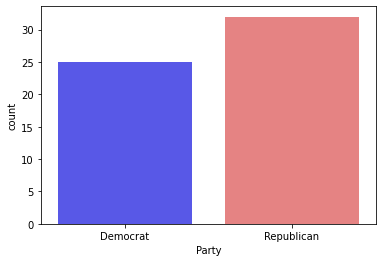

In [19]:
# Revisión de clases
sns.countplot(x="Party", data=df, palette=['#4040ff','#F57373'])
plt.show()

#### Separación de conjunto de datos
Se separan los datos en conjunto de **entrenamiento** y **test**. Se utilizó una proporción 70/30 y una semilla de random state de 23 para asegurar reproducibilidad al correr el modelo para diferentes condiciones.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['Speech'], df['Party'], test_size=0.3, random_state=23)

Vectorizamos las palabras ya procesadas en frecuencias de tal manera sea posible utilizarlas en los modelos de **regresión logística** y **Support Vector Machine**. Prestar atención que al conjunto de test sólo se aplica el transform a diferencia del conjuntode entrenamiento al cual se le aplican tanto el fit como el transform. 

In [21]:
vectorizer1 = CountVectorizer() # frecuencias absolutas
vectorizer2 = TfidfVectorizer() #frecuencias inversas
X_train_vec=vectorizer2.fit_transform(X_train)
X_test_vec=vectorizer2.transform(X_test)

#Revisamos si corresponde a la cantidad de filas esperadas
X_train_vec.toarray().shape

(39, 8102)

#### Modelo de Regresión Logística
En primer lugar aplicamos este modelo sin hacer revisión exhaustiva de los hiperparámetros. Esto contará como un primer resultado del modelo el cual se tratará de hacer tuning como siguiente paso.

In [22]:
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
y_pred_vec_log = lr.predict(X_test_vec)
#Se da un primer vistazo a las etiquetas predichas
y_pred_vec_log

array(['Democrat', 'Republican', 'Democrat', 'Republican', 'Republican',
       'Republican', 'Republican', 'Democrat', 'Democrat', 'Democrat',
       'Republican', 'Democrat', 'Republican', 'Republican', 'Republican',
       'Republican', 'Republican', 'Republican'], dtype=object)

A continuación, se declaran dos funciones necesarias relativas a **métricas y visualizaciones** para examinar los diferentes modelos.

In [23]:
# Se crea la función métricas para calcular los indicadores de la matríz de confusión.
def metricas (TN, FP, FN, TP):
    Sensibilidad = TP/(TP + FN)
    Especifidad = TN / (TN + FP)
    Exactitud = (TP + TN) / (TP + TN + FP + FN)
    Precision = TP / (TP + FP)

    return Sensibilidad,Especifidad,Precision,Exactitud

Se revisan las métricas para este primer modelo

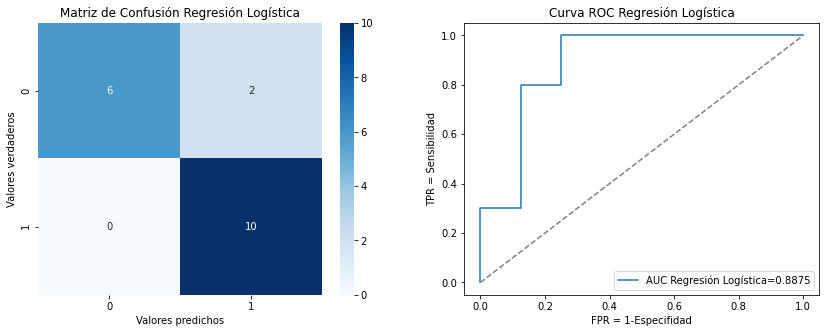

Sensibilidad = 1.0
Especificidad = 0.75
Precisión = 0.8333333333333334
Exactitud = 0.8888888888888888


In [24]:
#Matriz de confusión y Curva ROC Regresión Logística
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14,5))
axes = axes.flatten()

#Matriz de confusión
ax = axes[0]
TN_lr, FP_lr, FN_lr, TP_lr = confusion_matrix(y_test,y_pred_vec_log, labels=['Democrat','Republican']).ravel()
sns.heatmap([[TN_lr, FP_lr],[FN_lr, TP_lr]], annot=True,cmap=plt.cm.Blues,ax=ax)
ax.set_ylabel('Valores verdaderos')
ax.set_xlabel('Valores predichos')
ax.set_title('Matriz de Confusión Regresión Logística')
#Curva ROC
ax = axes[1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr.predict_proba(X_test_vec)[:,1],pos_label='Republican')
auc_lr = roc_auc_score(y_test,lr.predict_proba(X_test_vec)[:,1])
ax.set_xlabel('FPR = 1-Especifidad')
ax.set_ylabel('TPR = Sensibilidad')
ax.plot(fpr_lr, tpr_lr, label="AUC Regresión Logística="+str(auc_lr))
ax.plot([0,1], [0,1], 'k--', color='grey')
ax.set_title('Curva ROC Regresión Logística')
ax.legend(loc='lower right')
plt.show()

Sensibilidad_lr,Especifidad_lr,Precision_lr,Exactitud_lr = metricas (TN_lr, FP_lr, FN_lr, TP_lr)

print(f'Sensibilidad = {Sensibilidad_lr}\nEspecificidad = {Especifidad_lr}\nPrecisión = {Precision_lr}\nExactitud = {Exactitud_lr}')

Estas métricas reflejan un desempeño satisfactorio de este primer modelo. 

* En este contexto no tiene mayor importancia la separacion Sensibilidad y Especificidad ya que se tratan de etiquetas intercambiables de los partidos. Se puede ver en la matriz de confusión que para la etiqueta positiva, republicanos en este caso, es identificado en el total de los casos mientras que existen dos casos de democratas los cuales no son identificados de manera correcta.

* En la figura de la derecha se muestra la curva ROC del modelo junto con en área bajo la curva que arroja. Un AUC de la curva de 0.9 es más que satisfactorio aunque la forma escalonada con saltos largos de la curva nublan la eficiencia del modelo. Sin embargo, esto era de esperarse debido a que no se cuenta con una gran cantidad de datos.

#### Optimización o tuning de hiperparámetros

Mediante un GridSearchCV se buscará iterar con diferentes valores de C el cual controla la regularización del modelo. Recordar que en este problema esto puede ser útil debido a la gran cantidad de features comparado con la decena de datos que se tienen.

In [25]:
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
# Implementamos este Grid además de añadir un Cross Validation de 4-folds
c_search = sklearn.model_selection.GridSearchCV(LogisticRegression(), cv=4, param_grid=param_grid_)
c_search.fit(X_train_vec, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [26]:
# Imprimimos el score obtenido
print(c_search.best_score_,c_search.best_params_)

0.925 {'C': 10.0}


Ahora se aplica este hiperparámetro al modelo de LR.

In [27]:
from sklearn.linear_model import LogisticRegression
lr_10 = LogisticRegression(C= 100)
lr_10.fit(X_train_vec, y_train)

LogisticRegression(C=100)

In [28]:
y_pred_vec_10= lr_10.predict(X_test_vec)

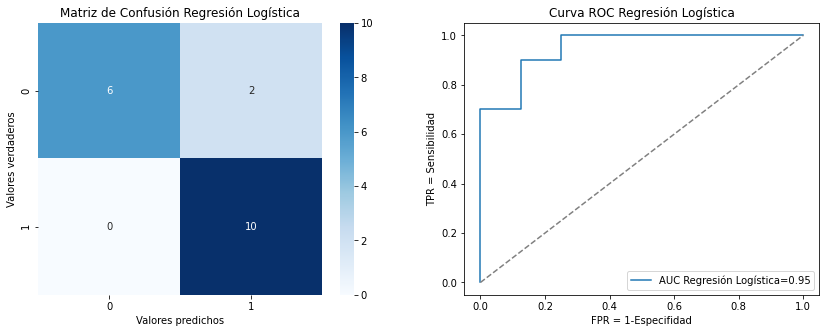

Sensibilidad = 1.0
Especifidad = 0.75
Precisión = 0.8333333333333334
Exactitud = 0.8888888888888888


In [29]:
#Matriz de confusión y Curva ROC Regresión Logística
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14,5))
axes = axes.flatten()

#Matriz de confusión
ax = axes[0]
TN_lr, FP_lr, FN_lr, TP_lr = confusion_matrix(y_test,y_pred_vec_10, labels=['Democrat','Republican']).ravel()
sns.heatmap([[TN_lr, FP_lr],[FN_lr, TP_lr]], annot=True,cmap=plt.cm.Blues,ax=ax)
ax.set_ylabel('Valores verdaderos')
ax.set_xlabel('Valores predichos')
ax.set_title('Matriz de Confusión Regresión Logística')
#Curva ROC
ax = axes[1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_10.predict_proba(X_test_vec)[:,1],pos_label='Republican')
auc_lr = roc_auc_score(y_test,lr_10.predict_proba(X_test_vec)[:,1])
ax.set_xlabel('FPR = 1-Especifidad')
ax.set_ylabel('TPR = Sensibilidad')
ax.plot(fpr_lr, tpr_lr, label="AUC Regresión Logística="+str(auc_lr))
ax.plot([0,1], [0,1], 'k--', color='grey')
ax.set_title('Curva ROC Regresión Logística')
ax.legend(loc='lower right')
plt.show()

Sensibilidad_lr,Especifidad_lr,Precision_lr,Exactitud_lr = metricas (TN_lr, FP_lr, FN_lr, TP_lr)

print(f'Sensibilidad = {Sensibilidad_lr}\nEspecifidad = {Especifidad_lr}\nPrecisión = {Precision_lr}\nExactitud = {Exactitud_lr}')

Estos resultados presentan una mejoría notable en el área bajo la curva con un valor de 0.95. Ya estamos tratando con un modelo aún mejor. Sin embargo, aún tenemos métricas idénticas de Sensibilidad, Especificidad, Precisión y Exactitud. El modelo sigue sin poder clasificar 2 presidentes de manera correcta. 

Si bien no existe una mejora en las 4 métricas vistas, este modelo se podría tomar como una mejoría al anterior ya que probablemente funcionaría mejor con nueva data y más data.

Debido a que se encontró un modelo mejorado, ahora estudiaremos el comportamiento de las métricas para **distintos umbrales o threshholds**

In [30]:
# Se crea la función "print_metrics" para calcular los indicadores de la matríz de confusión en distintos umbrales
def print_metrics (probabilidades, y_test, num_tr):

    df_prob = pd.DataFrame(probabilidades[:,1])
    df_metricas = pd.DataFrame(columns = [round(x/num_tr,2) for x in range(1, num_tr)], 
                               index=['TP','FN','FP','TN','Sensibilidad','Especifidad','Precision','Exactitud'])
    for i in range(1,num_tr):
        y_test = y_test.reset_index(drop=True)
        df_prob['prediction']=np.where(df_prob[0]>i/num_tr,'Republican','Democrat')
        df_prob['actual'] = y_test
        TN, FP, FN, TP = confusion_matrix(df_prob['actual'],df_prob['prediction'],labels=['Democrat','Republican']).ravel()
        Sensibilidad,Especifidad,Precision,Exactitud = metricas(TN, FP, FN, TP)
        df_metricas[round(i/num_tr,2)] = pd.Series({'TP':TP, 'FN':FN, 'FP':FP, 'TN':TN, 
                                              'Sensibilidad':round(Sensibilidad,2), 'Especifidad':round(Especifidad,2), 
                                              'Precision':round(Precision,2), 'Exactitud':round(Exactitud,2)})
    return df_metricas

In [31]:
# Aplicamos la función declarada en el segmento anterior
probabilidades = lr_10.predict_proba(X_test_vec)
lr_10_th = print_metrics(probabilidades,y_test,20)
lr_10_th

,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
TP,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,9.00,9.00,9.00,8.00,7.00,7.00,5.00,1.0
FN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,2.00,3.00,3.00,5.00,9.0
FP,8.00,5.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,1.00,0.00,0.00,0.0
TN,0.00,3.00,5.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,7.00,7.00,7.00,8.00,8.00,8.0
Sensibilidad,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.90,0.90,0.90,0.80,0.70,0.70,0.50,0.1
Especifidad,0.00,0.38,0.62,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.88,0.88,0.88,1.00,1.00,1.0
Precision,0.56,0.67,0.77,0.83,0.83,0.83,0.83,0.83,0.83,0.83,0.83,0.82,0.82,0.90,0.89,0.88,1.00,1.00,1.0
Exactitud,0.56,0.72,0.83,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.83,0.83,0.89,0.83,0.78,0.83,0.72,0.5


En el tabla mostrada se pueden observar las métricas para 20 diferentes umbrales. De nuevo, esto ayudaría a ajustar el threshold en caso de necesitar priorizar los positivos y los negativos, o en caso de clases desbalanceadas. En este contexto, inspeccionamos si existe alguna tendencia hacia mayores o menores de 0.5 que mejoren la clasificación pero no se observa nada de esto.

### Support Vector Machine

Ahora se aplicará otro método de clasificación para resolver este problema. En este caso se utilizará un soporte de vectores de máquina.

Iniciamos con una aplicación estándar sin una búsqueda de optimización de los hiperparámetros

In [32]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train_vec, y_train)

y_pred_vec_svm = svm.predict(X_test_vec)
y_pred_vec_svm

print(confusion_matrix(y_test, y_pred_vec_svm))

[[ 6  2]
 [ 0 10]]


Se buscarán los parámetros que luego de una cross validation de 4 hojas obtenga el mejor score

In [33]:
#Parámetros a iterar en el GridSearch
svc_grid = {'C' : [0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,1,10],
         'kernel': ['rbf','poly','linear'],
         'degree' : [3,4,5,6,7,8,9,10,20,30]}

# Definición del modelo
svc = SVC(random_state=23)

#Definición de GriSearch con parámetros asignados y CrossValidation Folds = 4
grid_SVC = GridSearchCV(svc, svc_grid, cv = 4)

#Se ejecuta el fit del modelo
grid_SVC.fit(X_train_vec,y_train)

#Se imprime el mejor estimador, para usar los hiperparámetros en el modelo
print("Mejor estimador SVM = ",grid_SVC.best_estimator_)
print("\nHiperparámetros =",grid_SVC.best_params_)
print("\nMejor Score =",grid_SVC.best_score_)

Mejor estimador SVM =  SVC(C=10, kernel='linear', random_state=23)

Hiperparámetros = {'C': 10, 'degree': 3, 'kernel': 'linear'}

Mejor Score = 0.95


Utilizamos estos parámetros para hacer nuestro fit del modelo

In [34]:
svc_model = SVC(C=10,
                probability = True,
                kernel = 'linear',
                degree = 3,           
)

svc_model.fit(X_train_vec,y_train)

SVC(C=10, kernel='linear', probability=True)

In [35]:
#Predicciones en el set de test
svm_y_pred=svc_model.predict(X_test_vec)

#Se procede a imprimir métricas
TN_sv, FP_sv, FN_sv, TP_sv = confusion_matrix(y_test,svm_y_pred, labels=['Democrat','Republican']).ravel()
Sensibilidad_sv,Especifidad_sv,Precision_sv,Exactitud_sv = metricas (TN_sv, FP_sv, FN_sv, TP_sv)

print(f'Sensibilidad = {Sensibilidad_sv}\nEspecifidad = {Especifidad_sv}\nPrecisión = {Precision_sv}\nExactitud = {Exactitud_sv}')

Sensibilidad = 1.0
Especifidad = 0.75
Precisión = 0.8333333333333334
Exactitud = 0.8888888888888888


Se puede observar métricas idénticas al caso anterior y ahora procederemos a graficar la matriz de confusión junto con la curva ROC.

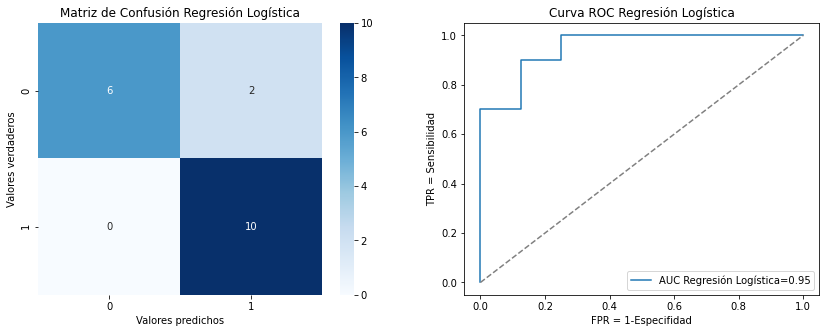

Sensibilidad = 1.0
Especifidad = 0.75
Precisión = 0.8333333333333334
Exactitud = 0.8888888888888888


In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14,5))
axes = axes.flatten()

#Matriz de confusión
ax = axes[0]
TN_sv, FP_sv, FN_sv, TP_sv = confusion_matrix(y_test,svm_y_pred, labels=['Democrat','Republican']).ravel()
sns.heatmap([[TN_sv, FP_sv],[FN_sv, TP_sv]], annot=True,cmap=plt.cm.Blues,ax=ax)
ax.set_ylabel('Valores verdaderos')
ax.set_xlabel('Valores predichos')
ax.set_title('Matriz de Confusión Regresión Logística')
#Curva ROC
ax = axes[1]
fpr_sv, tpr_sv, thresholds_sv = roc_curve(y_test, svc_model.predict_proba(X_test_vec)[:,1],pos_label='Republican')
auc_sv = roc_auc_score(y_test,svc_model.predict_proba(X_test_vec)[:,1])
ax.set_xlabel('FPR = 1-Especifidad')
ax.set_ylabel('TPR = Sensibilidad')
ax.plot(fpr_lr, tpr_lr, label="AUC Regresión Logística="+str(auc_sv))
ax.plot([0,1], [0,1], 'k--', color='grey')
ax.set_title('Curva ROC Regresión Logística')
ax.legend(loc='lower right')
plt.show()

Sensibilidad_sv,Especifidad_sv,Precision_sv,Exactitud_sv = metricas (TN_sv, FP_sv, FN_sv, TP_sv)

print(f'Sensibilidad = {Sensibilidad_sv}\nEspecifidad = {Especifidad_sv}\nPrecisión = {Precision_sv}\nExactitud = {Exactitud_sv}')

Finalmente y para este modelo final se mostrarán los resultados aplicando CV de 5 hojas, y así comprobar si el modelo no presenta overfitting.

In [37]:
# Se ejecuta Cross Validation al set completo para comprobar que el primer train/test split no está sesgado
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

cv = KFold(n_splits=5, shuffle=True, random_state=23)
i=1
scores_svc = []
for i, score in enumerate(cross_validate(svc_model, X_train_vec,y_train, cv=cv, scoring ='accuracy')["test_score"]):
    print(f"Exactitud para la CV #{i}: {score}")
    scores_svc.append(score)

cross_validation_score_svc = np.mean(scores_svc)
print('\nExactitud promedio en Cross Validation =',cross_validation_score_svc)

Exactitud para la CV #0: 1.0
Exactitud para la CV #1: 1.0
Exactitud para la CV #2: 1.0
Exactitud para la CV #3: 0.875
Exactitud para la CV #4: 1.0

Exactitud promedio en Cross Validation = 0.975


Se observa como los resultados de la métrica exactitud no llegan a diferir más de 15% y teniendo en cuenta el tamaño del conjunto de datos podemos quedar satisfechos con el desempeño del modelo también en este aspecto.

### Consideraciones finales

* Fueron aplicados de manera satisfactoria diferentes métodos de Machine Learning para la clasificación por partidos de los discursos de presidentes de Estados Unidos. Tanto el algoritmo de SVM y Regresión logística en sus versiones con parámetros optimizados lograron resultados más que satisfactorios con un AUC de 0.95 Y una exactitud de 88.8%.


* Una de las principales preocupaciones al estudiar el problema tenía que ver con la cantidad de datos. Estos no llegaban a los 100 y por tanto el riesgo de no hallar un modelo adecuado estaba presente. Además, para despejar cualquier duda de overfitting se aplicó al modelo final un KFold Cross Validation el cual confirmó el desempeño adecuado del modelo de SVM.


* En el aspecto de preprocesamiento de datos cabe destacar el lado eurístico de la metodología. Para llegar a un diccionario final de stopwords y ngramas a considerar fueron necesarias diferentes iteraciones y consideraciones que en definitiva influyeron en el resultado obtenido, el cual podemos asegurar que resultó satisfactorio y por encima de lo esperado. 

## Análisis de tópicos 
### Trump vs Obama

*Disclaimer:* El ejercicio está inspirado en la metodologia extraída de https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda, con un corpus distinto


Se separan en dos datasets los discursos pertenecientes a Donald Trump y Barack Obama

In [38]:
df_trump = df_2[df_2['President'] == 'Donald J. Trump']
df_obama = df_2[df_2['President'] == 'Barack Obama']

Se preparan los datos para aplicar el modelo LDA (Latent Dirichlet Allocation)

In [39]:
id2word = corpora.Dictionary(df_obama['Speech'])

# Se filtran las palabras límites desgún frecuencia
id2word.filter_extremes(no_below=2, no_above=0.7)

# Creamos los corpus
texts = df_obama['Speech']

# Se obtienen las frecuencias de las palabras en los corpus
corpus = [id2word.doc2bow(text) for text in texts]


In [40]:
from gensim.models import LdaModel 

# Se aplica el modelo LDA
lda=models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=4)

lda.print_topics(num_words=15)

[(0,
  '0.004*"leadership" + 0.003*"spending" + 0.003*"quality" + 0.002*"leave" + 0.002*"win" + 0.002*"voice" + 0.002*"isil" + 0.002*"afghan" + 0.002*"matter" + 0.002*"point" + 0.002*"highest" + 0.002*"network" + 0.002*"internet" + 0.002*"coming" + 0.002*"play"'),
 (1,
  '0.002*"spending" + 0.002*"leadership" + 0.002*"hundred" + 0.002*"second" + 0.002*"worse" + 0.002*"matter" + 0.002*"quality" + 0.002*"leave" + 0.002*"task" + 0.002*"minimum" + 0.002*"workforce" + 0.002*"serious" + 0.002*"lost" + 0.002*"prosperity" + 0.002*"address"'),
 (2,
  '0.004*"spending" + 0.004*"leadership" + 0.003*"close" + 0.003*"second" + 0.003*"solve" + 0.002*"result" + 0.002*"serious" + 0.002*"political" + 0.002*"moment" + 0.002*"election" + 0.002*"quality" + 0.002*"senate" + 0.002*"lending" + 0.002*"win" + 0.002*"lobbyist"'),
 (3,
  '0.003*"natural" + 0.003*"leadership" + 0.003*"speed" + 0.003*"spending" + 0.003*"minimum" + 0.003*"afghan" + 0.002*"matter" + 0.002*"offer" + 0.002*"point" + 0.002*"manufacture

Se visualizan los cuatro tópicos de manera que facilite el analisis posteriormente 

In [41]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.009346  0.000291       1        1  47.041523
0     -0.000095 -0.003521       2        1  39.887783
2     -0.008246 -0.000027       3        1  13.030921
1     -0.001004  0.003257       4        1   0.039768, topic_info=           Term       Freq      Total Category  logprob  loglift
441    spending  17.000000  17.000000  Default  30.0000  30.0000
673  leadership  21.000000  21.000000  Default  29.0000  29.0000
684      matter  13.000000  13.000000  Default  28.0000  28.0000
653     hundred   9.000000   9.000000  Default  27.0000  27.0000
362     quality  14.000000  14.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
298    mortgage   0.004257  11.745753   Topic4  -6.3309  -0.0929
79        close   0.004137  10.610523   Topic4  -6.3595  -0.0199
528      afghan   0.004323  14.083180   Topic4  -6.3155  -0.2590
721        play   0.004031  10.766857   Topic4  -6.3854  -0.0604
776       speed   0.004133  13.445370   Topic4  -6.3605  -0.2576

[312 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.373345  ability
0         2  0.373345  ability
0         3  0.186673  ability
2         1  0.367107    abuse
2         2  0.550660    abuse
...     ...       ...      ...
518       2  0.451380    worse
518       3  0.112845    worse
821       1  0.547749    wrote
821       2  0.182583    wrote
821       3  0.182583    wrote

[603 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

Se deja la posibilidad de comprobar el nivel de coherencia según el número de tópicos establecido para el modelo. De esta forma se puede comprobar si este número fue escogido de manera correcta o si resulta mejor cambiarlo.

In [42]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [43]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=10, step=1)

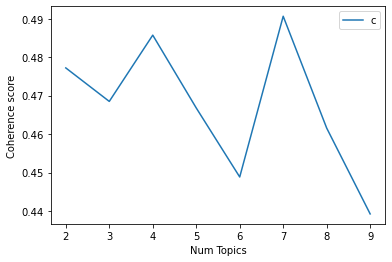

In [44]:
# Graficamos
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Se puede observar como la cantidad de tópicos que resultan con mayores valores de coherencia son 4 y 7. Se escogió la cantidad de 4 por ser un número más adecuado de analizar.

#### Se repite el proceso para los discursos de Trump

In [45]:
id2word_t = corpora.Dictionary(df_trump['Speech'])

id2word_t.filter_extremes(no_below=1, no_above=0.9)

# Corpus
texts_t = df_trump['Speech']

# Frecuencia
corpus_t = [id2word_t.doc2bow(text) for text in texts_t]

lda_t=models.ldamodel.LdaModel(corpus=corpus_t, id2word=id2word_t, num_topics=4)

lda_t.print_topics(num_words=15)

[(0,
  '0.003*"make" + 0.002*"ryan" + 0.002*"number" + 0.002*"alien" + 0.002*"party" + 0.002*"friend" + 0.002*"record" + 0.002*"dangerous" + 0.002*"please" + 0.002*"alice" + 0.002*"fight" + 0.002*"audience" + 0.002*"business" + 0.002*"unemployment" + 0.002*"men"'),
 (1,
  '0.002*"make" + 0.002*"unemployment" + 0.002*"number" + 0.002*"way" + 0.002*"please" + 0.002*"business" + 0.002*"heart" + 0.002*"ryan" + 0.002*"record" + 0.002*"alice" + 0.002*"nuclear" + 0.002*"audience" + 0.002*"fight" + 0.001*"deal" + 0.001*"ice"'),
 (2,
  '0.002*"please" + 0.002*"record" + 0.002*"make" + 0.002*"health_care" + 0.002*"alien" + 0.002*"number" + 0.002*"unemployment" + 0.002*"ice" + 0.002*"friend" + 0.002*"sanctuary" + 0.002*"audience" + 0.002*"lowest" + 0.002*"thanks" + 0.002*"find" + 0.002*"passed"'),
 (3,
  '0.002*"friend" + 0.002*"make" + 0.002*"ryan" + 0.002*"please" + 0.002*"alien" + 0.002*"audience" + 0.002*"party" + 0.002*"health_care" + 0.002*"gang" + 0.002*"number" + 0.002*"business" + 0.002*

In [46]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_t, corpus_t, id2word_t)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.002133  0.001946       1        1  45.058064
2      0.004159  0.000842       2        1  36.229740
3     -0.000015 -0.002483       3        1  13.696466
1     -0.002011 -0.000305       4        1   5.015726, topic_info=              Term       Freq      Total Category  logprob  loglift
497           make  13.000000  13.000000  Default  30.0000  30.0000
1635  unemployment  10.000000  10.000000  Default  29.0000  29.0000
708           ryan  10.000000  10.000000  Default  28.0000  28.0000
884            way   8.000000   8.000000  Default  27.0000  27.0000
338         friend  11.000000  11.000000  Default  26.0000  26.0000
...            ...        ...        ...      ...      ...      ...
338         friend   0.416916  11.124247   Topic4  -6.5728  -0.2914
376    health_care   0.401609   9.974792   Topic4  -6.6102  -0.2197
1071     dangerous   0.388304   8.527338   Topic4  -6.6438  -0.0967
937          alien   0.387240  11.125627   Topic4  -6.6466  -0.3654
309           find   0.380140   7.659952   Topic4  -6.6651  -0.0106

[330 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2         1  0.767486    abraham
3         1  0.315299     abroad
3         2  0.315299     abroad
2249      1  0.691647   adoption
2249      2  0.691647   adoption
...     ...       ...        ...
905       3  0.176261  wonderful
2667      1  0.450810   youngest
2667      2  0.450810   youngest
909       1  0.314875      youth
909       2  0.314875      youth

[544 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2])